In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
from google.colab import files as colab_files
uploaded = colab_files.upload()

Saving historical_data.csv to historical_data.csv


In [ ]:
data = pd.read_csv(r'historical_data.csv')
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [ ]:
data.shape

(197428, 16)

# Preprocessing

In [ ]:
# convert the DateTime features into the correct time zone
data["created_at"] = pd.to_datetime(data['created_at']).dt.tz_localize('utc').dt.tz_convert('US/Central').dt.tz_localize(None)
data["actual_delivery_time"] = pd.to_datetime(data['actual_delivery_time']).dt.tz_localize('utc').dt.tz_convert('US/Central').dt.tz_localize(None)
data["actual_total_delivery_duration"] = (data["actual_delivery_time"] - data["created_at"]).dt.total_seconds()
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration
0,1.0,2015-02-06 16:24:17,2015-02-06 17:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 15:49:25,2015-02-10 16:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 14:39:28,2015-01-22 15:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 15:21:45,2015-02-03 16:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-14 20:40:36,2015-02-14 21:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [ ]:
# create new features which might be useful
data['estimated_non_prep_duration'] = data["estimated_store_to_consumer_driving_duration"] + data["estimated_order_place_duration"]
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
0,1.0,2015-02-06 16:24:17,2015-02-06 17:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 15:49:25,2015-02-10 16:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0
2,3.0,2015-01-22 14:39:28,2015-01-22 15:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0
3,3.0,2015-02-03 15:21:45,2015-02-03 16:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0
4,3.0,2015-02-14 20:40:36,2015-02-14 21:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0


# Analysis

## Q1: How does time affect the delivery time?

### Outliers check

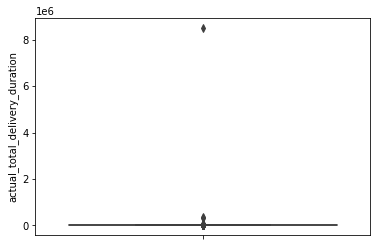

In [ ]:
sns.boxplot(data=data, y="actual_total_delivery_duration")

In [ ]:
data["actual_total_delivery_duration"].describe()

count    1.974210e+05
mean     2.908239e+03
std      1.922154e+04
min      1.010000e+02
25%      2.104000e+03
50%      2.660000e+03
75%      3.381000e+03
max      8.513259e+06
Name: actual_total_delivery_duration, dtype: float64

Minimum delivery time is 101 sec (1.68 mins) and max is 8.5 * 10^6 (99 days), they do not seem to make sense, thus we need to take a closer look at the outlier then decide if we drop them or still keep them.

In [ ]:
# Extract Orders with delivery time over five hours
data.loc[data["actual_total_delivery_duration"] > 7200]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
11,3.0,2015-02-15 22:19:33,2015-02-16 00:34:00,5477,NaN,1.0,2,2200,2,600,1600,3.0,3.0,4.0,446,642.0,8067.0,1088.0
163,6.0,2015-02-07 21:28:59,2015-02-07 23:32:11,976,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN,251,1104.0,7392.0,1355.0
459,1.0,2015-02-01 21:21:25,2015-02-01 23:32:27,414,japanese,3.0,4,3380,4,385,1395,21.0,23.0,51.0,251,927.0,7862.0,1178.0
701,4.0,2015-02-01 19:47:52,2015-02-01 21:53:12,4753,burger,1.0,3,2727,3,399,1299,44.0,44.0,76.0,446,804.0,7520.0,1250.0
793,1.0,2015-02-04 21:35:13,2015-02-04 23:37:31,132,fast,4.0,2,1478,2,479,999,25.0,27.0,49.0,251,721.0,7338.0,972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196949,1.0,2015-02-01 20:13:04,2015-02-01 22:31:26,5658,japanese,3.0,3,3700,3,700,2200,18.0,20.0,30.0,251,992.0,8302.0,1243.0
196966,4.0,2015-01-23 16:32:59,2015-01-23 18:41:22,629,seafood,3.0,5,1944,3,129,899,NaN,NaN,NaN,251,998.0,7703.0,1249.0
197045,4.0,2015-02-13 15:35:28,2015-02-13 18:03:27,1409,vietnamese,5.0,1,825,1,750,750,46.0,41.0,45.0,251,467.0,8879.0,718.0
197208,1.0,2015-02-04 21:59:25,2015-02-05 00:31:04,2177,NaN,1.0,7,5100,6,500,1700,22.0,24.0,44.0,446,601.0,9099.0,1047.0


There are 1090 orders that arrive after more than 2 hours after order being placed, which takes up 0.55% of the whole dataset, since it is not common for an order to take more than 2 hours arrive, so I decide to drop these 1090 rows


In [ ]:
data = data[data["actual_total_delivery_duration"] < 7200]

It is unreasonable for an order to arrive within 3 mins after order being placed considering food prepartion and driving time, so I decide to drop these three outliers

In [ ]:
data.loc[data["actual_total_delivery_duration"] <= 180]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
63294,2.0,2015-01-24 17:52:55,2015-01-24 17:54:36,4210,mexican,2.0,3,1455,2,355,745,44.0,48.0,40.0,251,275.0,101.0,526.0


In [ ]:
data = data[data["actual_total_delivery_duration"] > 180]

### Q1a. Does delivery time vary with the day of the week?


In [ ]:
data['day'] = pd.to_datetime(data['created_at']).dt.weekday

In [ ]:
data['actual_total_delivery_duration_hour'] = data['actual_total_delivery_duration']/3600

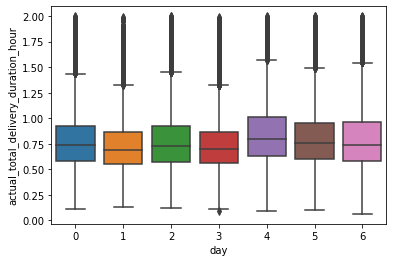

In [ ]:
sns.boxplot(data=data, x="day", y="actual_total_delivery_duration_hour")

Delivery duration does not vary much across different days of the week.

**ANOVA test:**

In [ ]:
data['day'].value_counts() # Almost evenly distributed in seven days

4    32709
5    32700
6    30781
3    26665
2    25149
0    24482
1    23844
Name: day, dtype: int64

In [ ]:
# Take 200 samples from the dataset (200/196330)
sample1 = data.sample(frac=0.001, replace=True, random_state=1)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('actual_total_delivery_duration ~ C(day)', data=sample1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(day),8.160627e+06,6.0,1.238754,0.288259
Residual,2.075147e+08,189.0,NaN,NaN


Based on the results, the p value is 0.288 which is significantly high. It’s fair to assume that there is no significant difference in delivery duration in different days of the week.

### Q1b: Will the order take longer to arrive during rush hour?

In [ ]:
data['hour'] = pd.to_datetime(data['created_at']).dt.hour

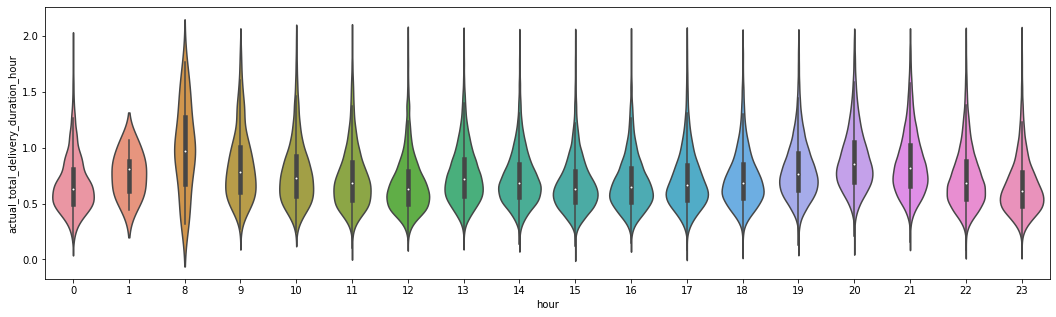

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.violinplot(data=data, x="hour", y="actual_total_delivery_duration_hour")

In [ ]:
data.shape

(196330, 22)

In [ ]:
data['hour'].value_counts()

20    36623
19    28047
21    26868
14    15517
22    15192
13    13486
18    12624
15    11430
16     8783
17     8117
23     7077
12     5086
11     3404
10     2089
0      1415
9       525
8        36
1        11
Name: hour, dtype: int64

Among the hourly data we have, the order placed at 8am has the longest delivery duration and the largest variance. 

## Q2: Is there a difference in delivery time between different prices and types of food? 

### Q2a: Does the expensive food take longer to arrive? 

In [ ]:
data['subtotal']=data['subtotal'].replace(0,data['subtotal'].median())

In [ ]:
# data[data['subtotal']==0]

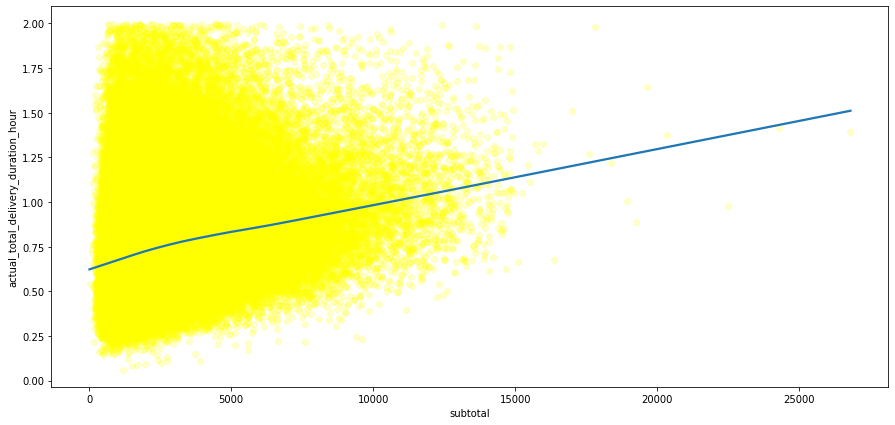

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(data=data, x="subtotal", y="actual_total_delivery_duration_hour", lowess=True, scatter_kws = {'color': 'yellow', 'alpha': 0.2})

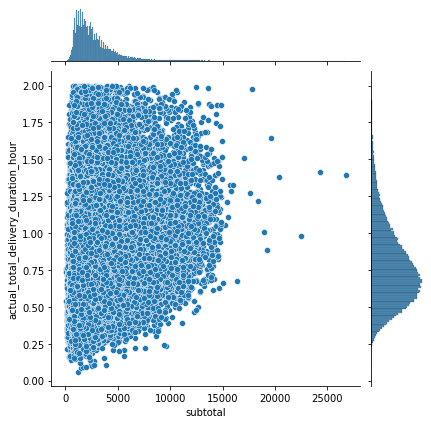

In [ ]:
sns.jointplot(data=data, x="subtotal", y="actual_total_delivery_duration_hour")

From the scatter plot, we can tell the delivery duration increase slightly with the total value of the order

In [ ]:
data["subtotal"].corr(data['actual_total_delivery_duration'])

0.228866994933099

Since the food price distribution is right skewed, we categorize food price into three categories: cheap, medium, expensive

In [ ]:
data["subtotal_cat"] = pd.qcut(data.subtotal, q=[0, .33, .66, 1], labels=["cheap", "medium", "expensive"])

In [ ]:
data["subtotal_cat"].value_counts()

expensive    66629
cheap        65090
medium       64611
Name: subtotal_cat, dtype: int64

In [ ]:
data.groupby("subtotal_cat").agg(avg=("subtotal","mean")) 

,avg
subtotal_cat,
cheap,1157.319112
medium,2220.620622
expensive,4617.658752


In [ ]:
data.groupby("subtotal_cat").agg(avg=("actual_total_delivery_duration_hour","mean"))

,avg
subtotal_cat,
cheap,0.721840
medium,0.774145
expensive,0.857126


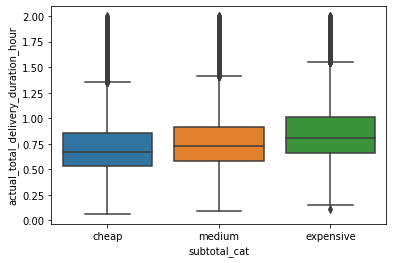

In [ ]:
sns.boxplot(data=data, x="subtotal_cat", y="actual_total_delivery_duration_hour")

### Q2b: Does restaurant type have some impact?

In [ ]:
data["store_primary_category"].nunique()

74

In [ ]:
grouped = data.groupby(by=['store_primary_category'])['market_id'].count().reset_index()
grouped.sort_values('market_id', ascending=False).head(10)

,store_primary_category,market_id
4,american,19236
56,pizza,17166
47,mexican,16993
13,burger,10877
59,sandwich,9990
20,chinese,9343
40,japanese,9082
24,dessert,8687
28,fast,7308
36,indian,7257


We chose American, Mexican, Chinese, Japanese, dessert to explore if restaurant type have some impact on delivery time

In [ ]:
data_sub = data[data['store_primary_category'].isin(['american','mexican','chinese','japanese','dessert'])]

Qcut delivery time into 3 bins: "fast", "normal", "slow"

In [ ]:
data_sub["delivery_speed_cat"] = pd.qcut(data_sub.actual_total_delivery_duration, q=[0, .33, .66, 1], labels=["fast", "normal", "slow"])

Mosaic Plot

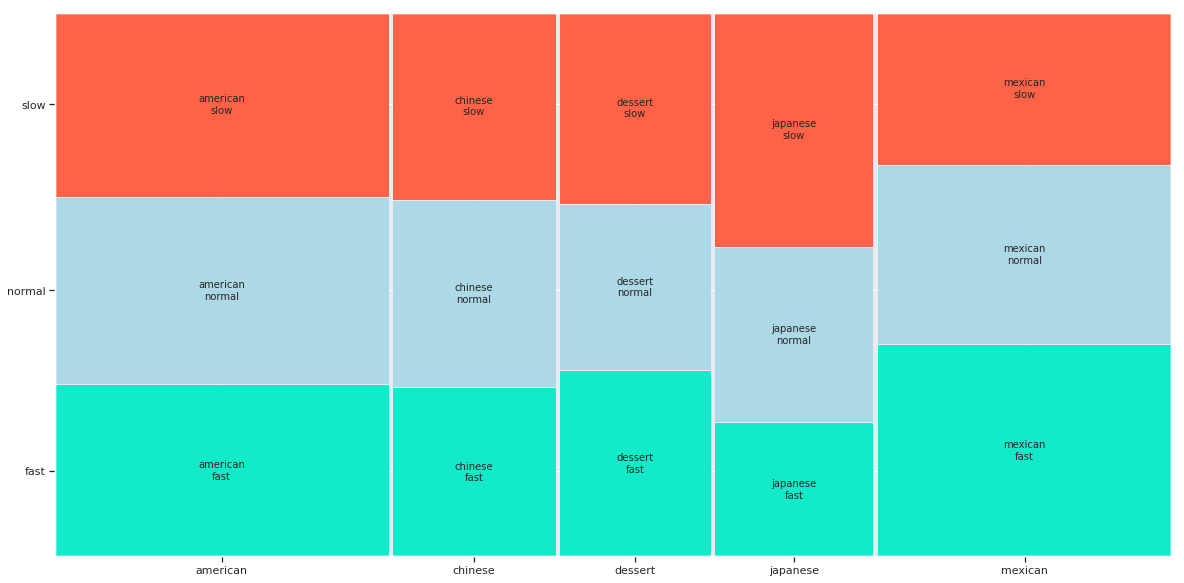

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

props = lambda key: {'color': 'tomato' if 'slow' in key else ('lightblue' if 'normal' in key else 'xkcd:aqua')}
sns.set(rc={"figure.figsize":(20, 10)})
t = mosaic(data_sub, ['store_primary_category','delivery_speed_cat'], properties=props)

Food from Japanese restaurants take longer time to arrive and mexican restuaurants take shorter. That makes sense if you thinks the food preparation time for sushi place e.g. sadako vs chipotle.

## Q3: How well we can predict the delivery time?

### Deal with missing values

In [ ]:
data.columns[data.isna().any()].tolist()

['market_id',
 'store_primary_category',
 'order_protocol',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_store_to_consumer_driving_duration',
 'estimated_non_prep_duration']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196330 entries, 0 to 197427
Data columns (total 23 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     195352 non-null  float64       
 1   created_at                                    196330 non-null  datetime64[ns]
 2   actual_delivery_time                          196330 non-null  datetime64[ns]
 3   store_id                                      196330 non-null  int64         
 4   store_primary_category                        191606 non-null  object        
 5   order_protocol                                195340 non-null  float64       
 6   total_items                                   196330 non-null  int64         
 7   subtotal                                      196330 non-null  int64         
 8   num_distinct_items                            196330 n

Since non values take a really small portion (~10%) of the whole dataset, we can drop rows containing non values without losing much information

In [ ]:
data_nan_free = data.dropna(how='any')

In [ ]:
# data_nan_free.info()

In [ ]:
data_nan_free["busy_dashers_ratio"] = data_nan_free["total_busy_dashers"] / data_nan_free["total_onshift_dashers"]

### One hot encoding for the categorical data

In [ ]:
# create dummies for order protocol
order_protocol_dummies = pd.get_dummies(data_nan_free.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0
14,1,0,0,0,0,0,0
15,1,0,0,0,0,0,0


In [ ]:
# create dummies for market_id
market_id_dummies = pd.get_dummies(data_nan_free.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
8,0,1,0,0,0,0
14,1,0,0,0,0,0
15,1,0,0,0,0,0


In [ ]:
# create dummies for store primary category
store_primary_category_dummies = pd.get_dummies(data_nan_free.store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, actual_total_delivery_duration
train_df = data_nan_free.drop(columns = ["created_at", "actual_delivery_time", "market_id", "store_id", "store_primary_category",  
                                         "order_protocol","subtotal_cat","actual_total_delivery_duration_hour","actual_total_delivery_duration_log"])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,day,hour,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,4,16,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,1,15,2.000000
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,735.0,6,18,0.750000
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1241.0,2,21,1.200000
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,651.0,0,20,1.000000


In [ ]:
# concat all
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)
# align dtype over dataset
train_df = train_df.astype("float32")
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,446.0,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,446.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.shape

(174803, 101)

### Correlation Check

We have 100 columns in our final dataset, which means there might be redundant features. These features are not useful in a way by repeating another feature or having a zero standard deviation. Therefore, doesn't add any new knowledge to ML models. Another potential problem is collinearity. We will check all of them. We start with the correlation matrix.

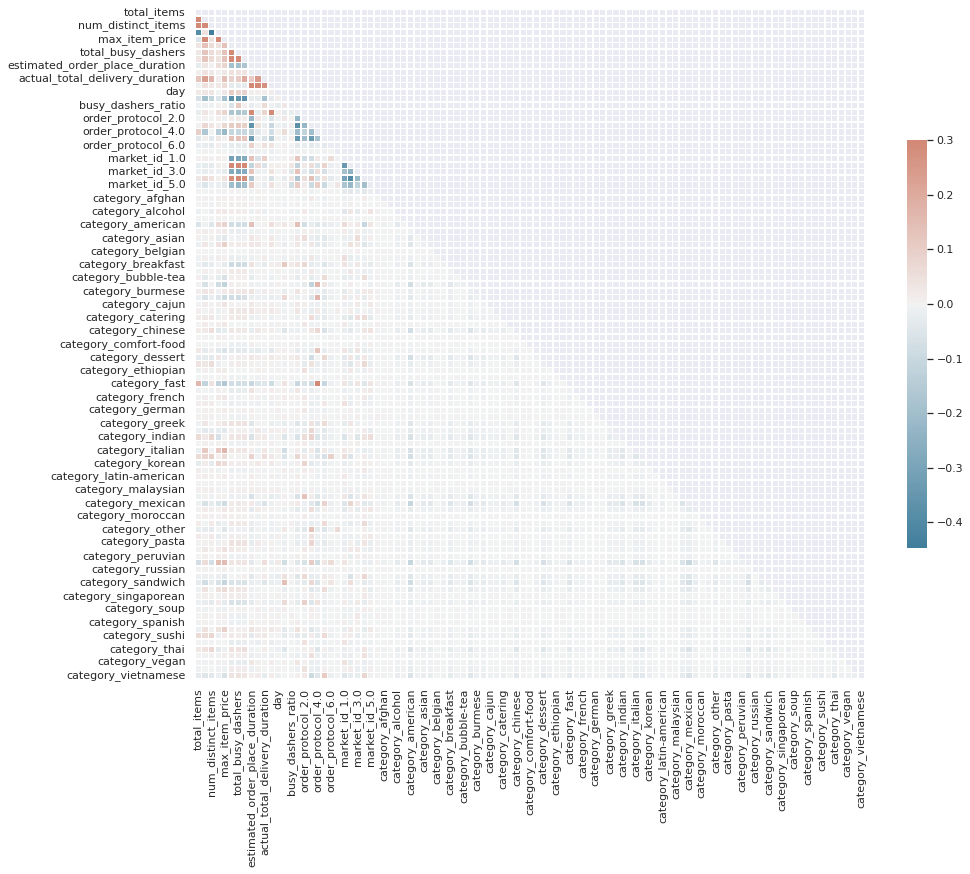

In [ ]:
# it could take some time to run this cell since we are calculating correlation matrix in a dimesion of (100x100)
# to have a better visualization, we will take only one triangle 
# because other trangle is only its symmetry (i.e a x b and b x a)

# Generate a mask for the upper triangle
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
def get_redundant_pairs(df):
    """Get diagonal and lower triangular pairs of correlation matrix"""
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    """Sort correlations in the descending order and return n highest results"""
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers             0.943602
                                              total_outstanding_orders       0.936331
total_busy_dashers                            total_outstanding_orders       0.932995
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923815
estimated_order_place_duration                order_protocol_1.0             0.900518
total_items                                   num_distinct_items             0.757643
subtotal                                      num_distinct_items             0.681485
total_items                                   subtotal                       0.554839
min_item_price                                max_item_price                 0.540874
subtotal                                      max_item_price                 0.510221
order_protocol_4.0                            category_fast                  0.501208
num_distinct_items          

In [ ]:
# drop highly correlated features
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
                                  "estimated_non_prep_duration"])

In [ ]:
train_df.shape

(174803, 98)

Create New feature:"avg_price_per_item" and "percent_distinct_item_of_total"

In [ ]:
train_df["avg_price_per_item"] = train_df["subtotal"] / train_df["total_items"]
train_df["percent_distinct_item_of_total"] = train_df["num_distinct_items"] / train_df["total_items"]
train_df.drop(columns=["total_items", "subtotal","num_distinct_items"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration                order_protocol_1.0                0.900518
min_item_price                                avg_price_per_item                0.862060
max_item_price                                avg_price_per_item                0.771313
min_item_price                                max_item_price                    0.540874
order_protocol_4.0                            category_fast                     0.501208
market_id_2.0                                 market_id_4.0                     0.395948
order_protocol_1.0                            order_protocol_3.0                0.373279
estimated_order_place_duration                order_protocol_3.0                0.363383
total_outstanding_orders                      hour                              0.351163
order_protocol_1.0                            order_protocol_5.0                0.342358
market_id_1.0                                 market_id_2.0                     0.34

Create New feature: Price range of items


In [ ]:
train_df["price_range_of_items"] = train_df["max_item_price"] - train_df["min_item_price"]
train_df.drop(columns=["max_item_price", "min_item_price"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration                order_protocol_1.0                0.900518
order_protocol_4.0                            category_fast                     0.501208
market_id_2.0                                 market_id_4.0                     0.395948
order_protocol_1.0                            order_protocol_3.0                0.373279
estimated_order_place_duration                order_protocol_3.0                0.363383
total_outstanding_orders                      hour                              0.351163
order_protocol_1.0                            order_protocol_5.0                0.342358
market_id_1.0                                 market_id_2.0                     0.341487
order_protocol_3.0                            order_protocol_5.0                0.336623
estimated_order_place_duration                order_protocol_5.0                0.332648
market_id_1.0                                 market_id_4.0                     0.30

Order protocol 1-5 (a store can receive orders from DoorDash through many modes) are highly related to each other or other variables, it would be better to drop those columns.

In [ ]:
train_df.drop(columns=["order_protocol_1.0", "order_protocol_2.0", "order_protocol_3.0","order_protocol_4.0", "order_protocol_5.0"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
market_id_2.0                                 market_id_4.0                     0.395948
total_outstanding_orders                      hour                              0.351163
market_id_1.0                                 market_id_2.0                     0.341487
                                              market_id_4.0                     0.308294
total_outstanding_orders                      market_id_2.0                     0.295725
                                              market_id_4.0                     0.278186
                                              market_id_1.0                     0.273439
                                              market_id_3.0                     0.269464
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.246774
market_id_2.0                                 market_id_3.0                     0.244358
avg_price_per_item                            percent_distinct_item_of_total    0.22

Market id 1-5 (A city/region in which DoorDash operates) are highly related to each other or with other variables, it would be better to drop those columns.

In [ ]:
train_df.drop(columns=["market_id_1.0","market_id_2.0","market_id_3.0","market_id_4.0","market_id_5.0"], inplace=True)
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_outstanding_orders                      hour                              0.351163
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.246774
avg_price_per_item                            percent_distinct_item_of_total    0.226892
category_pizza                                avg_price_per_item                0.217783
total_outstanding_orders                      actual_total_delivery_duration    0.201659
                                              estimated_order_place_duration    0.174593
category_fast                                 avg_price_per_item                0.172129
hour                                          category_breakfast                0.170904
category_italian                              avg_price_per_item                0.154799
category_fast                                 percent_distinct_item_of_total    0.149869
estimated_order_place_duration                category_american                 0.14

In [ ]:
train_df.columns

Index(['total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_total_delivery_duration', 'day', 'hour', 'busy_dashers_ratio',
       'order_protocol_6.0', 'order_protocol_7.0', 'market_id_6.0',
       'category_afghan', 'category_african', 'category_alcohol',
       'category_alcohol-plus-food', 'category_american', 'category_argentine',
       'category_asian', 'category_barbecue', 'category_belgian',
       'category_brazilian', 'category_breakfast', 'category_british',
       'category_bubble-tea', 'category_burger', 'category_burmese',
       'category_cafe', 'category_cajun', 'category_caribbean',
       'category_catering', 'category_cheese', 'category_chinese',
       'category_chocolate', 'category_comfort-food',
       'category_convenience-store', 'category_dessert', 'category_dim-sum',
       'category_ethiopian', 'category_european', 'category_fast',
       'category_filipino', 'category_french', 'c

In [ ]:
# replace inf values with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,day,hour,busy_dashers_ratio,order_protocol_6.0,order_protocol_7.0,market_id_6.0,...,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese,avg_price_per_item,percent_distinct_item_of_total,price_range_of_items
0,21.0,446.0,861.0,3779.0,4.0,16.0,0.424242,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,860.25,1.00,682.0
1,2.0,446.0,690.0,4024.0,1.0,15.0,2.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.00,1.00,0.0
8,18.0,446.0,289.0,1586.0,6.0,18.0,0.750000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1192.75,0.75,784.0
14,8.0,446.0,795.0,2273.0,2.0,21.0,1.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1525.00,1.00,0.0
15,7.0,446.0,205.0,2988.0,0.0,20.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810.00,1.00,770.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(features):
    """Compute VIF score using variance_inflation_factor() function"""
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [ ]:
# apply VIF computation to all columns
features = train_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,market_id_6.0,1.000557
1,category_alcohol-plus-food,1.000565
2,category_chocolate,1.000680
3,category_belgian,1.001003
4,busy_dashers_ratio,1.003837
...,...,...
80,category_chinese,5.015763
81,category_burger,5.569325
82,category_mexican,8.144623
83,category_pizza,8.851612


In [ ]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove category_american
I will remove hour


,feature,VIF
0,category_alcohol-plus-food,1.000081
1,category_belgian,1.000134
2,category_chocolate,1.000134
3,category_lebanese,1.000462
4,category_russian,1.000547
...,...,...
78,avg_price_per_item,5.723496
79,busy_dashers_ratio,6.044683
80,estimated_store_to_consumer_driving_duration,6.661612
81,estimated_order_place_duration,10.933818


### What features are important?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# selected features are selected in multicollinearity check part
X = train_df[selected_features]
y = train_df["actual_total_delivery_duration"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

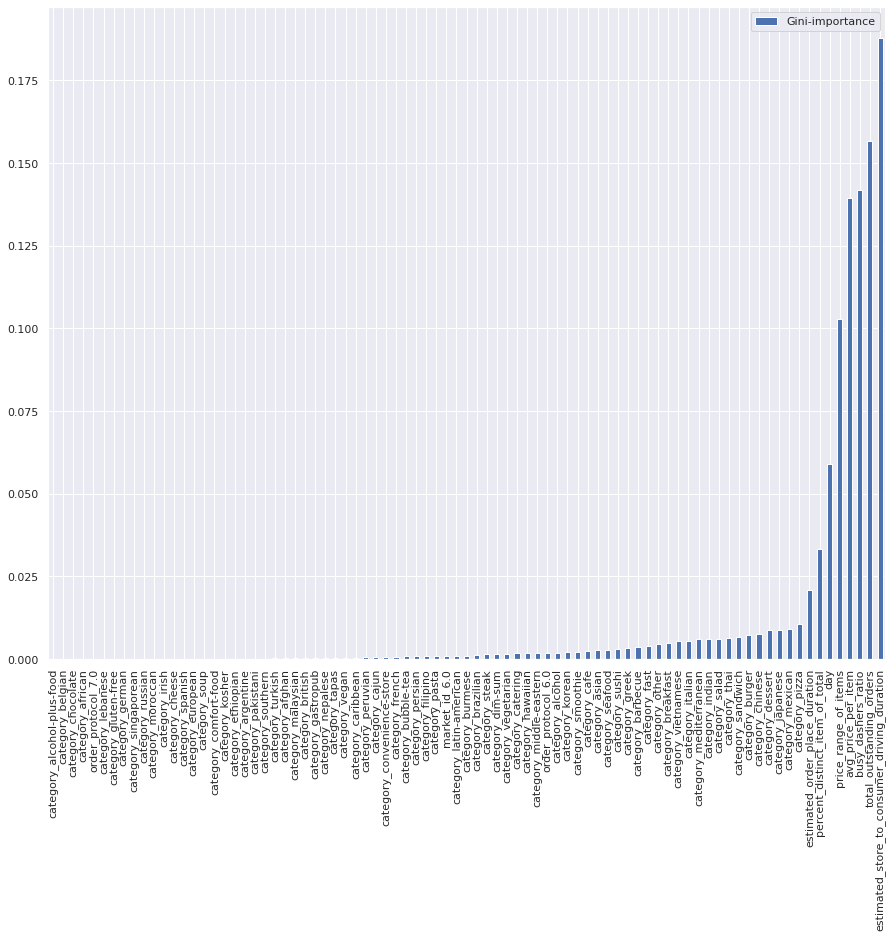

In [ ]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

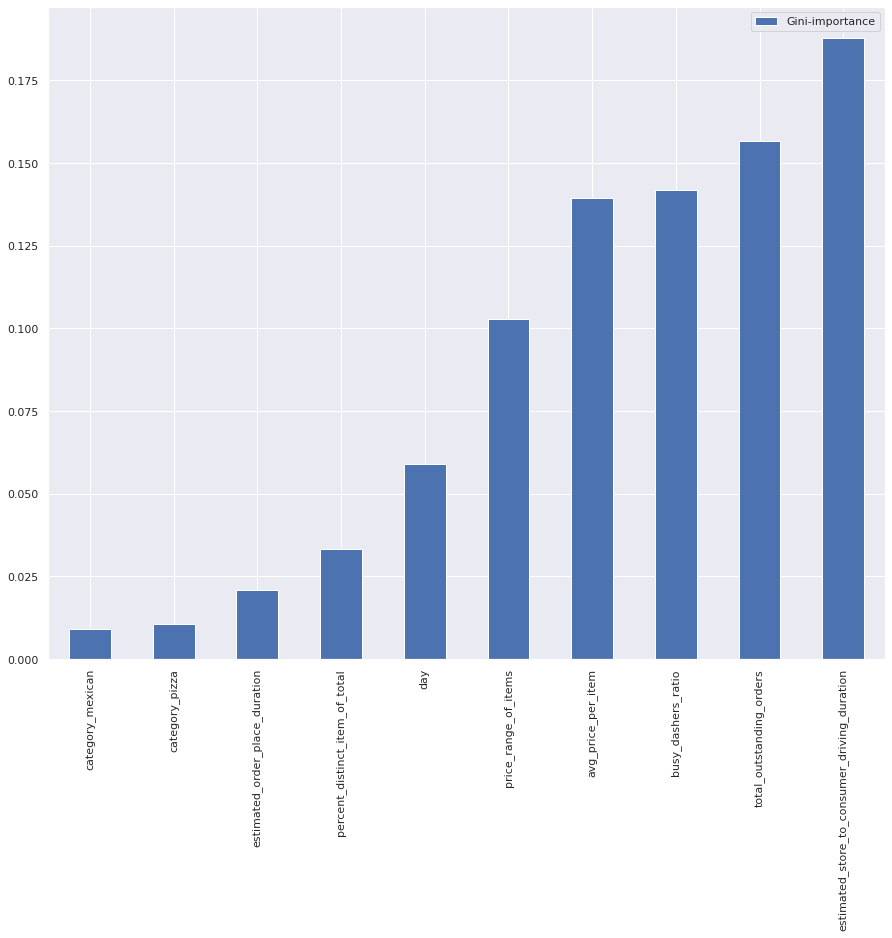

In [ ]:
# check the most important ones
importances.sort_values(by='Gini-importance')[-10:].plot(kind='bar', rot=90, figsize=(15,8))
plt.show()

In [ ]:
# we can obtain the column names as next
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'order_protocol_6.0',
 'category_alcohol',
 'category_korean',
 'category_smoothie',
 'category_cafe',
 'category_asian',
 'category_seafood',
 'category_sushi',
 'category_greek',
 'category_barbecue',
 'category_fast',
 'category_other',
 'category_breakfast',
 'category_vietnamese',
 'category_italian',
 'category_mediterranean',
 'category_indian',
 'category_salad',
 'category_thai',
 'category_sandwich',
 'category_burger',
 'category_chinese',
 'category_dessert',
 'category_japanese',
 'category_mexican',
 'category_pizza',
 'estimated_order_place_duration',
 'percent_distinct_item_of_total',
 'day',
 'price_range_of_items',
 'avg_price_per_item',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'estimated_store_to_consumer_driving_duration']

The five most important features are "estimated_store_to_consumer_driving_duration", "busy_dashers_ratio","total_outstanding_orders", "avg_price_per_item", "hour"

### Can we use PCA to reduce the dataset dimensions while still preserving the most of information?

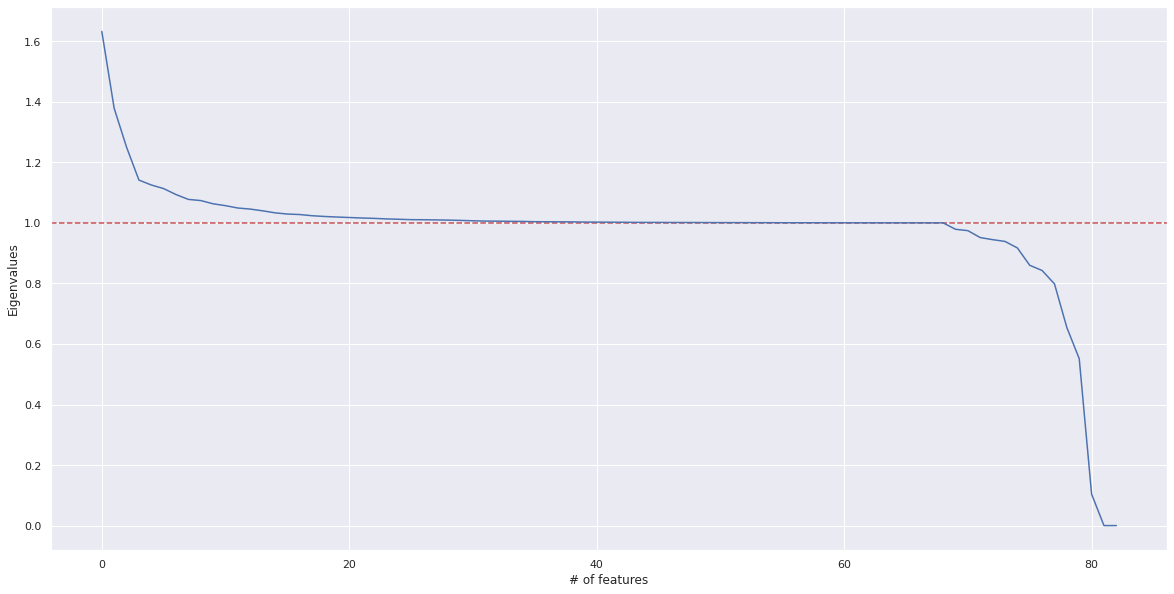

In [ ]:
# apply PCA to see feature contributions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train=X_train.values
X_Train=np.asarray(X_Train)
X_std=StandardScaler().fit_transform(X_Train)

covar_matrix = PCA(n_components = 83)
covar_matrix.fit(X_std)

plt.ylabel("Eigenvalues")
plt.xlabel("# of features")
plt.axhline(y=1,color='r',linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

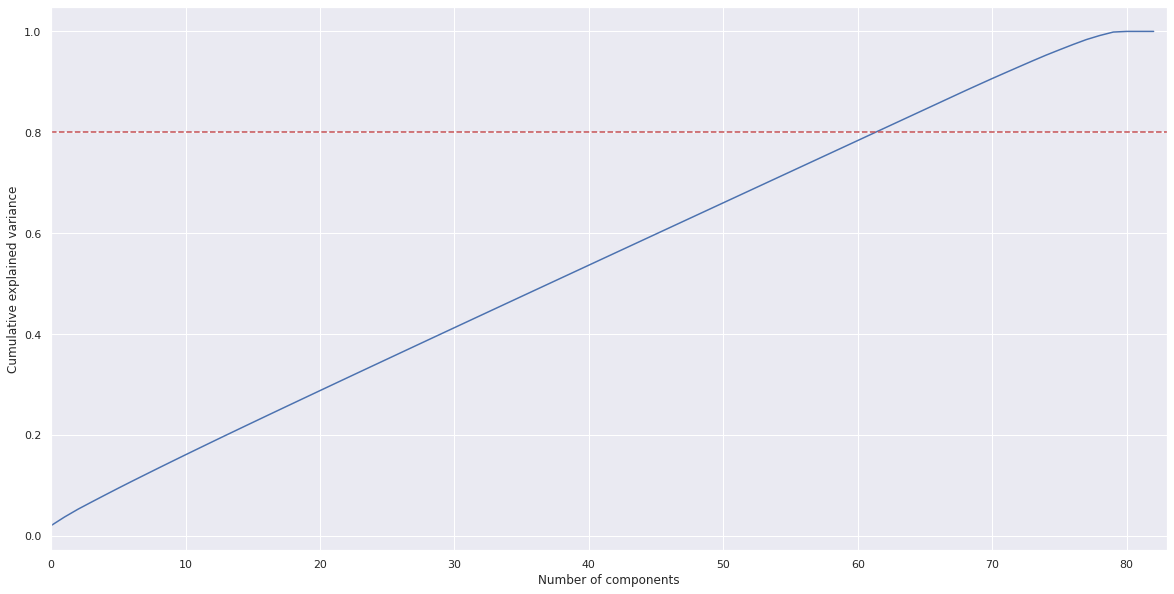

In [ ]:
# Finding normalised array of X_Train
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8,color='r',linestyle='--')
plt.xlim(0,83,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

80% of the dataset can be explained by at least 60 representative features, which makes the PCA transformation useless 

### Which Model gives the most accurate prediction?

***The following code refer to the example provided by stratascratch.***

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    """Apply the selected scaler to features and target variables"""
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [ ]:
from sklearn.metrics import mean_squared_error
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict=model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    """Convert the scaled error to actual error"""
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    # return RMSE with squared False     
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print("Error = "'{}'.format(rmse_error)+" in " + model_name)
    
    return rmse_error, y_predict

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": [],
}


regression_models = {
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP":  MLPRegressor(),
}

feature_sets = {
    "full dataset": X.columns.to_list(),
    "selected_features_60": importances.sort_values(by='Gini-importance')[-60:].index.tolist(),
    "selected_features_30": importances.sort_values(by='Gini-importance')[-30:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(), 
}

scalers = {
    "Standard scaler": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}

# examine the error for each combination
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():   
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["actual_total_delivery_duration"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
            
            else:
                
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are full dataset

Error = 918.6631846413296 in Ridge
Error = 919.7479627721422 in DecisionTree
Error = 896.485871777738 in RandomForest
[09:12:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Error = 887.8703662600859 in XGBoost
Error = 873.4864327321778 in LGBM
Error = 887.7696687487459 in MLP
-----scaled with MinMax scaler-------- included columns are full dataset

Error = 918.609296039207 in Ridge
Error = 919.7479627721422 in DecisionTree
Error = 895.6868458204158 in RandomForest
[09:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Error = 886.9146939265377 in XGBoost
Error = 873.1949907396714 in LGBM
Error = 911.5786449657802 in MLP
-----scaled with NotScale-------- included columns are full dataset

Train error = 924.5147732877981 in Ridge
Test error = 918.6503556792825 in Ridge
Tr

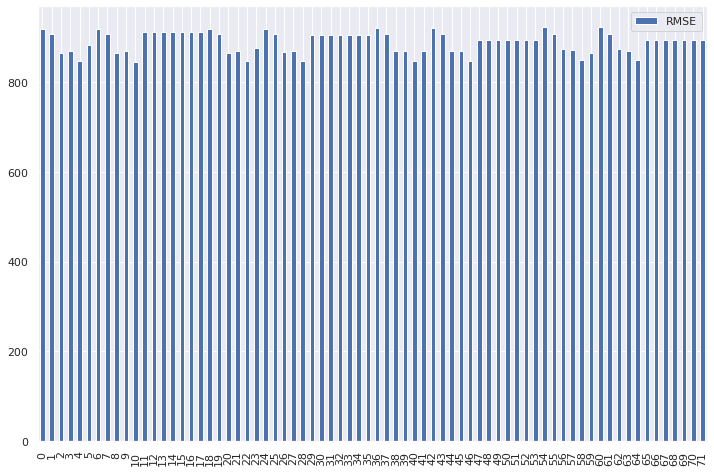

In [ ]:
pred_df = pd.DataFrame(pred_dict)
pred_df.sort_Values(by=['RMSE'], ascending = True).head()
pred_df.plot(kind='bar', figsize=(12,8))